In [1]:
import numpy as np
import pandas as pd

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('CO2 Emissions.csv')
df.head()
df.shape

(7385, 12)

## Understanding the data distribution

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

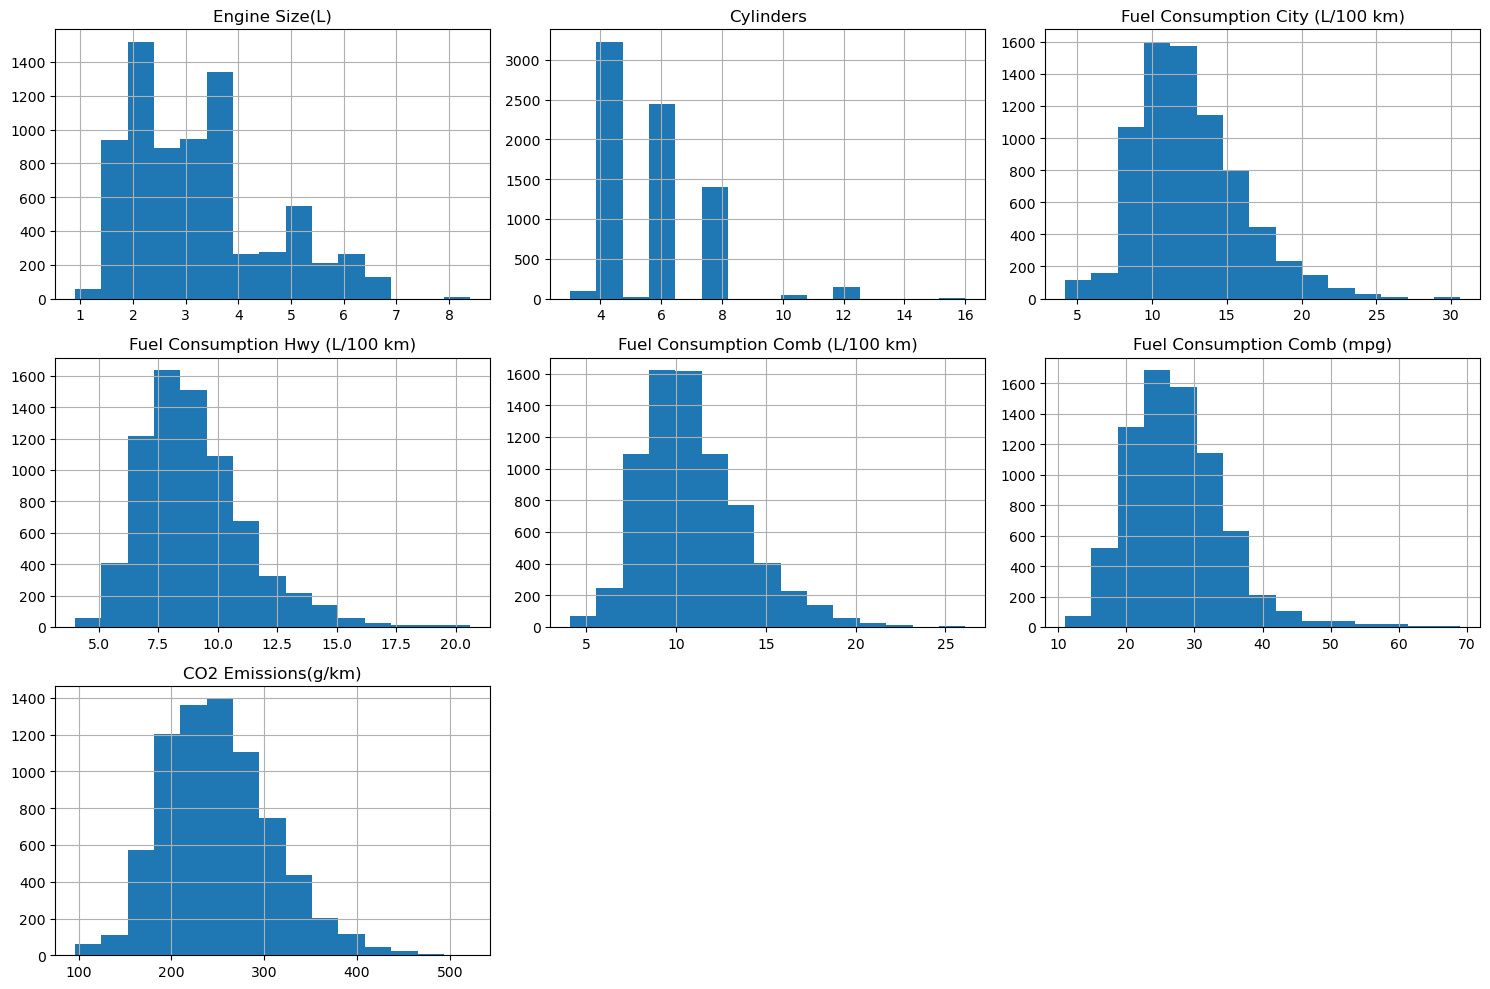

In [5]:
# histograms for numerical columns present in the dataset
numerical_columns = ['Engine Size(L)', 'Cylinders', 'Fuel Consumption City (L/100 km)', 
                     'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)', 
                     'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)']
df[numerical_columns].hist(bins=15, figsize=(15, 10), layout=(3, 3))
plt.tight_layout()
plt.show()

## Handling missing values

In [6]:
df.isnull().sum()

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64

## Outlier Detection using Boxplots

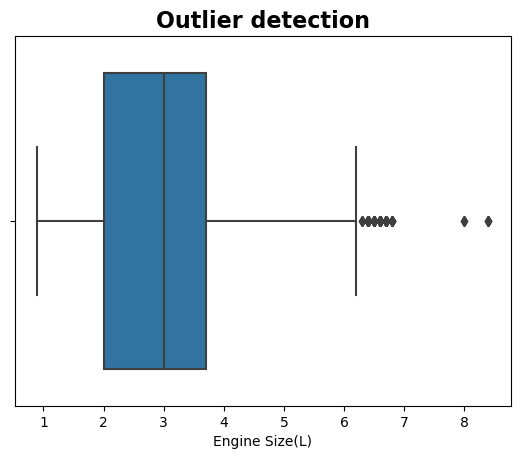

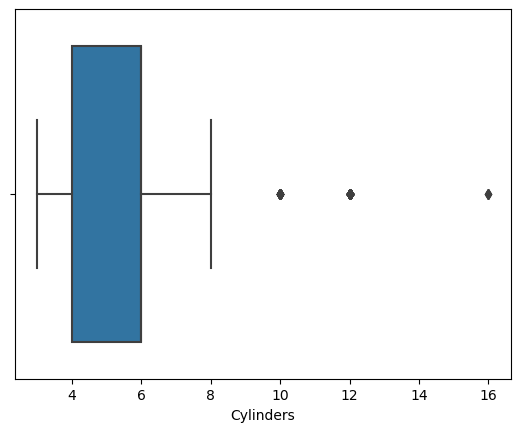

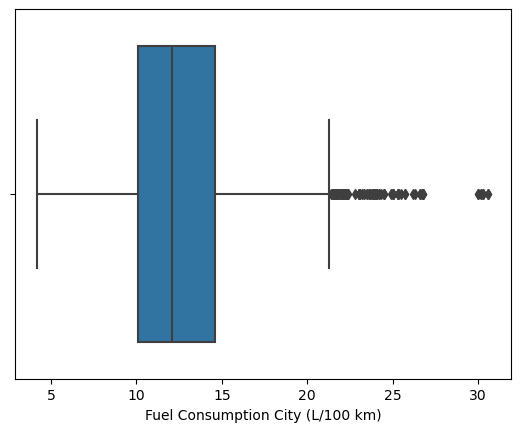

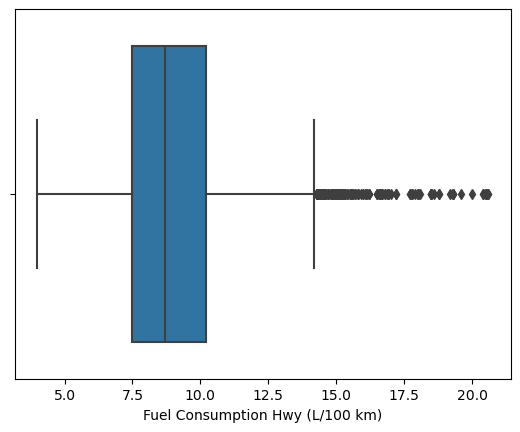

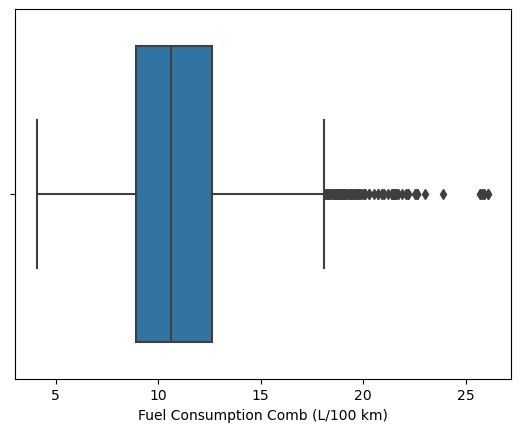

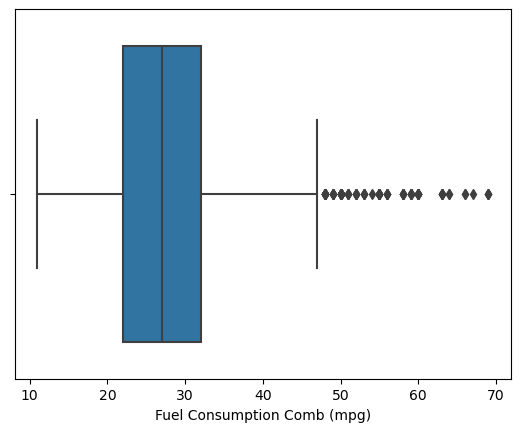

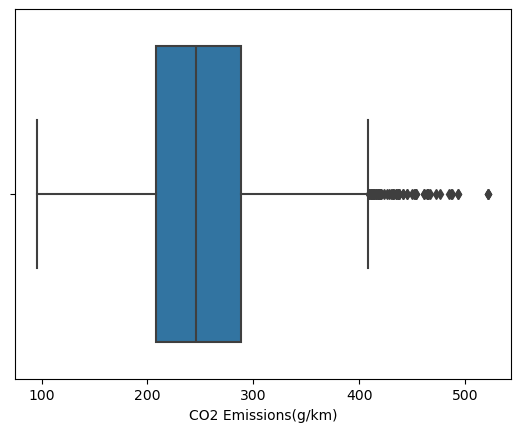

In [7]:
# boxplots for outlier detection
plt.title("Outlier detection", fontsize=16, fontweight='bold')
for col in numerical_columns:
    sns.boxplot(x=df[col])
    plt.show()

In [8]:
for col in numerical_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"Column {col} - Outliers Found: {len(outliers)}")

Column Engine Size(L) - Outliers Found: 0
Column Cylinders - Outliers Found: 0
Column Fuel Consumption City (L/100 km) - Outliers Found: 0
Column Fuel Consumption Hwy (L/100 km) - Outliers Found: 0
Column Fuel Consumption Comb (L/100 km) - Outliers Found: 0
Column Fuel Consumption Comb (mpg) - Outliers Found: 0
Column CO2 Emissions(g/km) - Outliers Found: 0


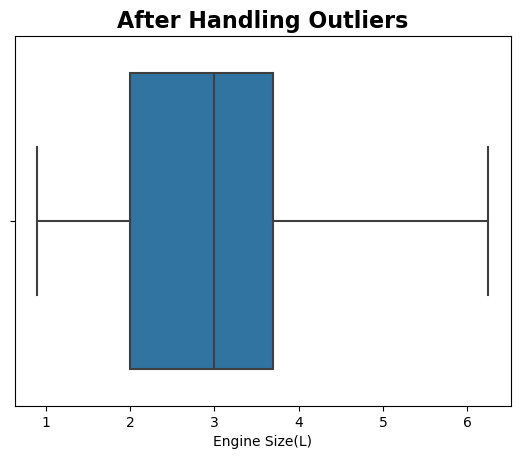

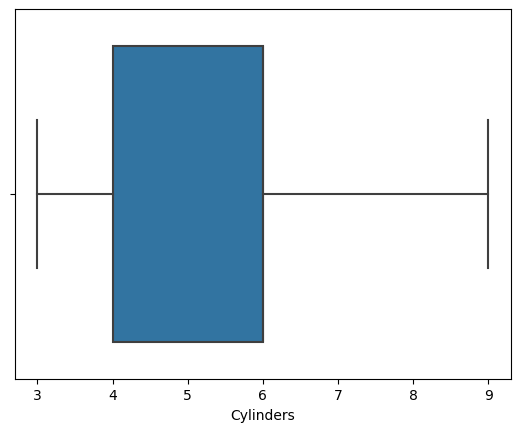

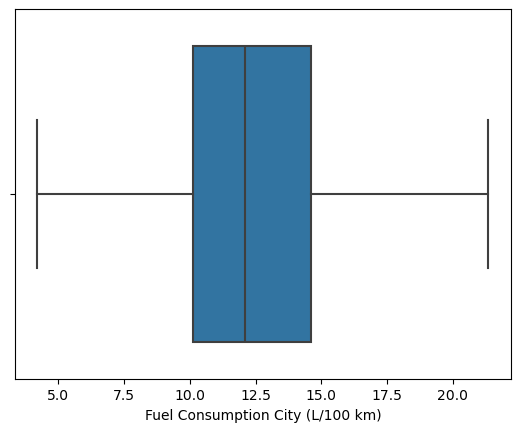

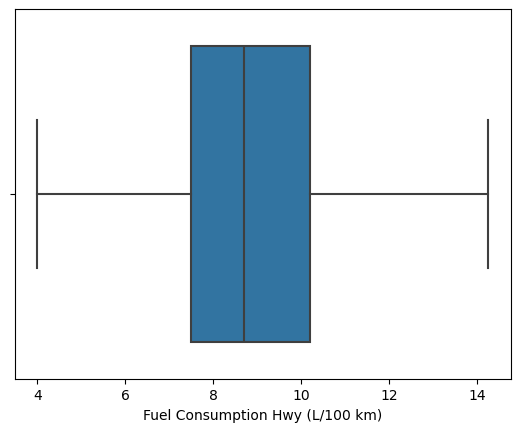

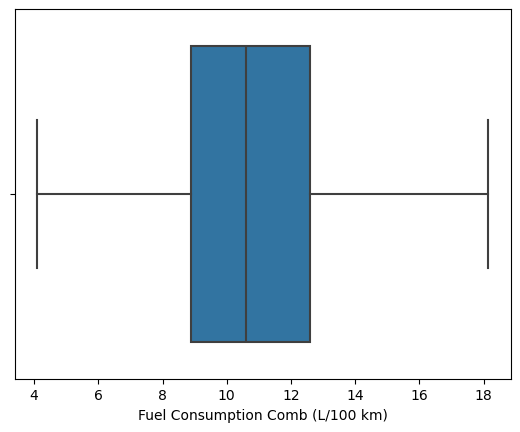

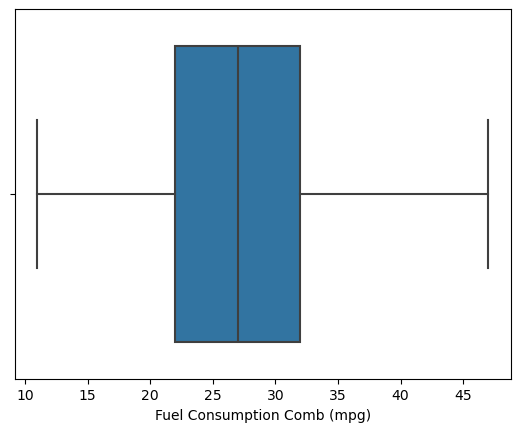

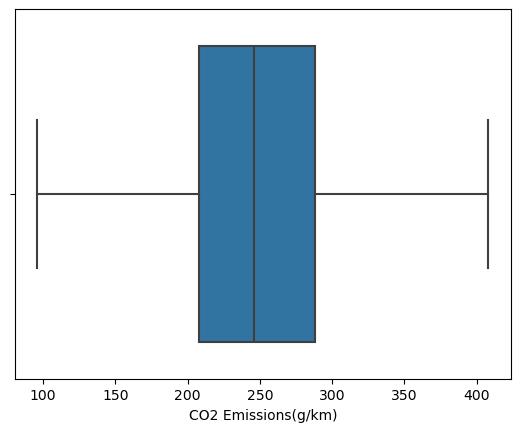

In [9]:
# replotting boxplots to check for outliers
plt.title("After Handling Outliers", fontsize=16, fontweight='bold')
for col in numerical_columns:
    sns.boxplot(x=df[col])
    plt.show()

In [10]:
df.shape

(7385, 12)

## Feature Selection

In [11]:
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,47,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


### Using Correlation matrix

In [12]:
num_df = df.drop(['Make', 'Model', 'Vehicle Class', 'Transmission', 'Fuel Type'], axis='columns')
num_df

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,2.0,4,9.9,6.7,8.5,33,196
1,2.4,4,11.2,7.7,9.6,29,221
2,1.5,4,6.0,5.8,5.9,47,136
3,3.5,6,12.7,9.1,11.1,25,255
4,3.5,6,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...
7380,2.0,4,10.7,7.7,9.4,30,219
7381,2.0,4,11.2,8.3,9.9,29,232
7382,2.0,4,11.7,8.6,10.3,27,240
7383,2.0,4,11.2,8.3,9.9,29,232


In [13]:
correlation_matrix = num_df.corr()
print(correlation_matrix['CO2 Emissions(g/km)'].sort_values(ascending=False))

CO2 Emissions(g/km)                 1.000000
Fuel Consumption Comb (L/100 km)    0.927862
Fuel Consumption City (L/100 km)    0.925447
Fuel Consumption Hwy (L/100 km)     0.902474
Engine Size(L)                      0.852406
Cylinders                           0.840185
Fuel Consumption Comb (mpg)        -0.929102
Name: CO2 Emissions(g/km), dtype: float64


In [14]:
df1 = df.drop(['Fuel Consumption Comb (mpg)'], axis='columns')
df1.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,244


In [15]:
df1.shape

(7385, 11)

### Categorical Feature Analysis

In [16]:
from sklearn.feature_selection import SelectKBest, f_classif

# One-hot encode categorical features
data_encoded = pd.get_dummies(df1, drop_first=True)

# Select features based on ANOVA F-statistic
X = data_encoded.drop('CO2 Emissions(g/km)', axis=1)
y = df1['CO2 Emissions(g/km)']
selector = SelectKBest(score_func=f_classif, k='all')
selector.fit(X, y)

feature_scores = pd.DataFrame({'Feature': X.columns, 'Score': selector.scores_})
print(feature_scores.sort_values(by='Score', ascending=False))

                               Feature       Score
1758        Model_Shelby GT500 Mustang         inf
1448                   Model_Prius AWD         inf
1112                       Model_IONIQ  169.304689
4     Fuel Consumption Comb (L/100 km)  168.553517
2     Fuel Consumption City (L/100 km)  161.479000
...                                ...         ...
1093           Model_Highlander AWD LE    0.284795
773           Model_E 350 4MATIC WAGON    0.284795
1581     Model_Range Rover Evoque P300    0.284795
317              Model_ALLROAD QUATTRO    0.284795
473                        Model_C 350    0.284795

[2143 rows x 2 columns]


In [17]:
threshold = feature_scores['Score'].median()  # Example threshold
important_features = feature_scores[feature_scores['Score'] > threshold]
print(important_features)

                               Feature       Score
0                       Engine Size(L)   90.668783
1                            Cylinders   82.873339
2     Fuel Consumption City (L/100 km)  161.479000
3      Fuel Consumption Hwy (L/100 km)  123.863054
4     Fuel Consumption Comb (L/100 km)  168.553517
...                                ...         ...
2137                   Transmission_M6    3.105666
2138                   Transmission_M7    2.712516
2139                       Fuel Type_E    2.842104
2141                       Fuel Type_X    5.076994
2142                       Fuel Type_Z    5.107994

[1071 rows x 2 columns]


In [18]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X[important_features['Feature']], y)
importances = model.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': important_features['Feature'],
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

feature_importance_df.head(20)

,Feature,Importance
4,Fuel Consumption Comb (L/100 km),0.921485
2139,Fuel Type_E,0.044025
2,Fuel Consumption City (L/100 km),0.016520
0,Engine Size(L),0.005618
1,Cylinders,0.001927
2112,Vehicle Class_VAN - PASSENGER,0.001325
2103,Vehicle Class_PICKUP TRUCK - STANDARD,0.001281
2109,Vehicle Class_SUV - STANDARD,0.000770
2102,Vehicle Class_PICKUP TRUCK - SMALL,0.000696
2141,Fuel Type_X,0.000688


In [19]:
df1.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,244


In [20]:
df2 = df1.drop(['Make','Model','Transmission'], axis='columns')
df2.shape

(7385, 8)

## Handling Categorical Varibles

In [21]:
df2.head()

,Vehicle Class,Engine Size(L),Cylinders,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km)
0,COMPACT,2.0,4,Z,9.9,6.7,8.5,196
1,COMPACT,2.4,4,Z,11.2,7.7,9.6,221
2,COMPACT,1.5,4,Z,6.0,5.8,5.9,136
3,SUV - SMALL,3.5,6,Z,12.7,9.1,11.1,255
4,SUV - SMALL,3.5,6,Z,12.1,8.7,10.6,244


In [22]:
df2['Vehicle Class'].unique()

array(['COMPACT', 'SUV - SMALL', 'MID-SIZE', 'TWO-SEATER', 'MINICOMPACT',
       'SUBCOMPACT', 'FULL-SIZE', 'STATION WAGON - SMALL',
       'SUV - STANDARD', 'VAN - CARGO', 'VAN - PASSENGER',
       'PICKUP TRUCK - STANDARD', 'MINIVAN', 'SPECIAL PURPOSE VEHICLE',
       'STATION WAGON - MID-SIZE', 'PICKUP TRUCK - SMALL'], dtype=object)

In [23]:
df2['Fuel Type'].unique()

array(['Z', 'D', 'X', 'E', 'N'], dtype=object)

In [24]:
import category_encoders as ce

In [25]:
binary_encoder = ce.BinaryEncoder(cols = ['Fuel Type','Vehicle Class'])

In [26]:
df3 = binary_encoder.fit_transform(df2)

In [27]:
df3.head()

,Vehicle Class_0,Vehicle Class_1,Vehicle Class_2,Vehicle Class_3,Vehicle Class_4,Engine Size(L),Cylinders,Fuel Type_0,Fuel Type_1,Fuel Type_2,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km)
0,0,0,0,0,1,2.0,4,0,0,1,9.9,6.7,8.5,196
1,0,0,0,0,1,2.4,4,0,0,1,11.2,7.7,9.6,221
2,0,0,0,0,1,1.5,4,0,0,1,6.0,5.8,5.9,136
3,0,0,0,1,0,3.5,6,0,0,1,12.7,9.1,11.1,255
4,0,0,0,1,0,3.5,6,0,0,1,12.1,8.7,10.6,244


In [28]:
df3.shape

(7385, 14)

## Feature Engineering

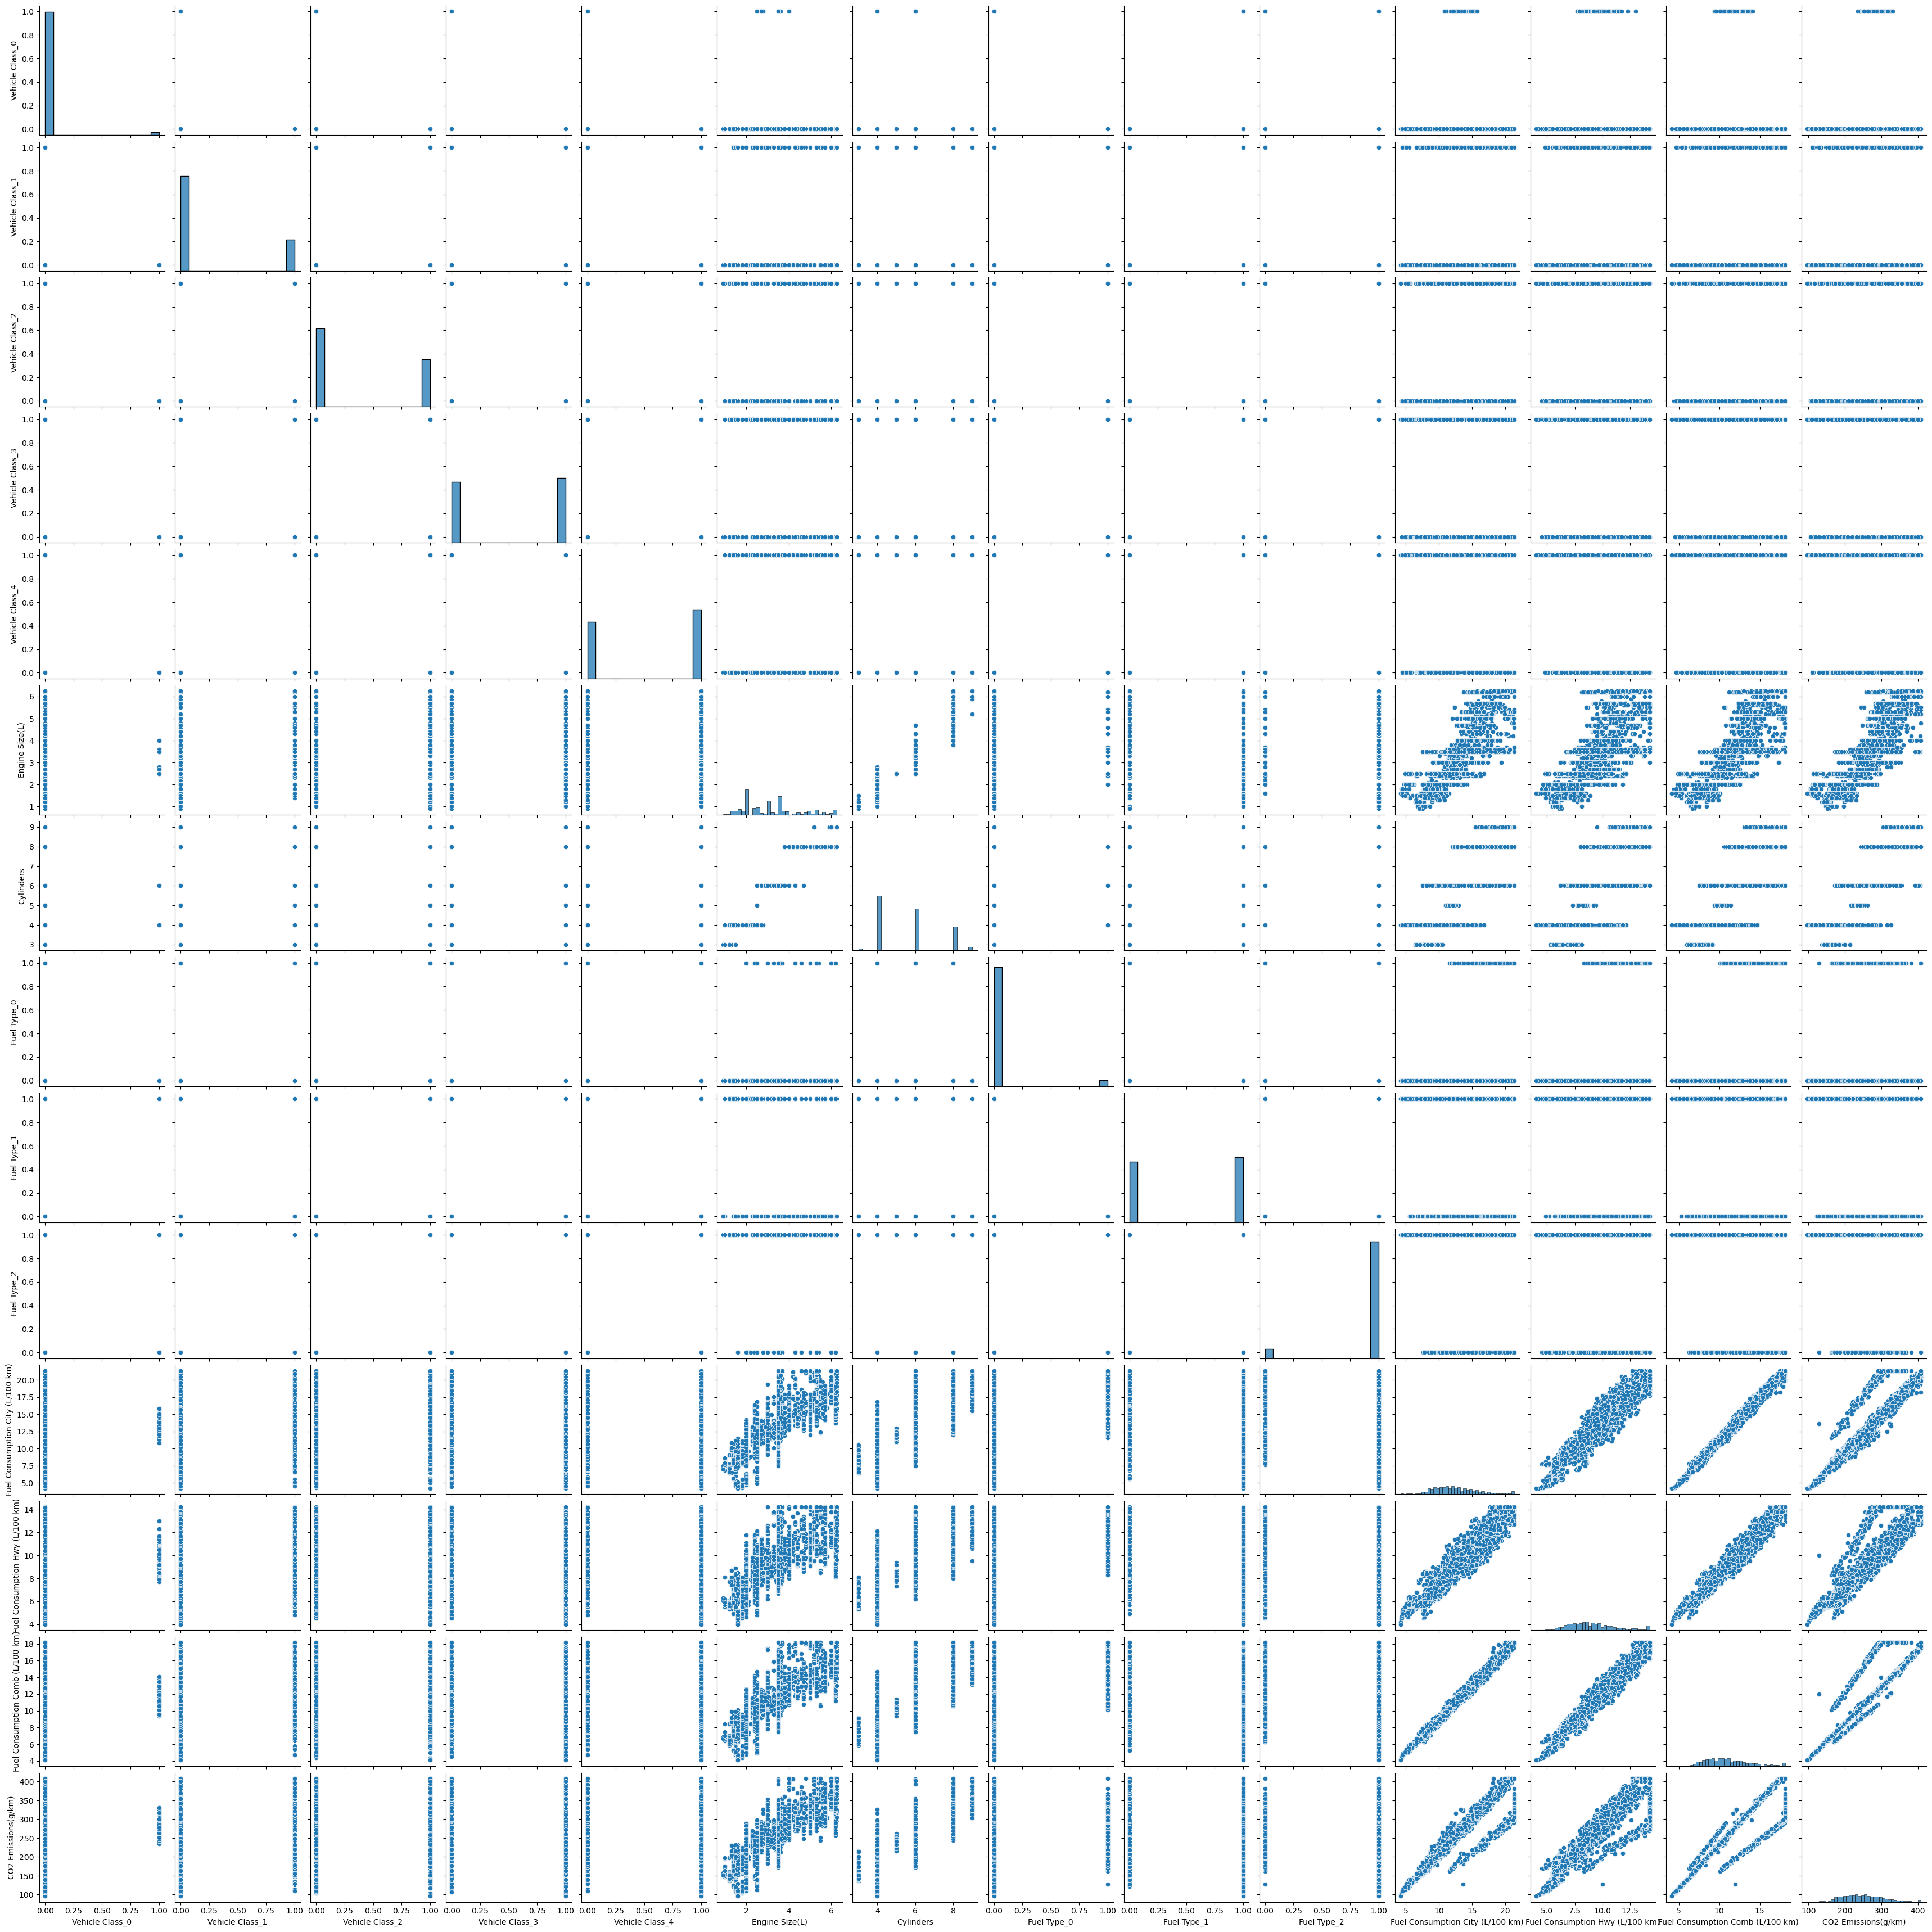

In [29]:
# to understand relationship between features and target variable
sns.pairplot(df3)
plt.show()

In [30]:
# adding new features
df3['CO2 per Liter'] = df3['CO2 Emissions(g/km)'] / df3['Engine Size(L)']
df3['Fuel Consumption per Cylinder'] = df3['Fuel Consumption Comb (L/100 km)'] / df3['Cylinders']

In [31]:
df3.head()

,Vehicle Class_0,Vehicle Class_1,Vehicle Class_2,Vehicle Class_3,Vehicle Class_4,Engine Size(L),Cylinders,Fuel Type_0,Fuel Type_1,Fuel Type_2,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km),CO2 per Liter,Fuel Consumption per Cylinder
0,0,0,0,0,1,2.0,4,0,0,1,9.9,6.7,8.5,196,98.000000,2.125000
1,0,0,0,0,1,2.4,4,0,0,1,11.2,7.7,9.6,221,92.083333,2.400000
2,0,0,0,0,1,1.5,4,0,0,1,6.0,5.8,5.9,136,90.666667,1.475000
3,0,0,0,1,0,3.5,6,0,0,1,12.7,9.1,11.1,255,72.857143,1.850000
4,0,0,0,1,0,3.5,6,0,0,1,12.1,8.7,10.6,244,69.714286,1.766667


In [32]:
# correlation matrix to check importance of new features
correlation_matrix = df3.corr()
print(correlation_matrix['CO2 Emissions(g/km)'].sort_values(ascending=False))

CO2 Emissions(g/km)                 1.000000
Fuel Consumption Comb (L/100 km)    0.927862
Fuel Consumption City (L/100 km)    0.925447
Fuel Consumption Hwy (L/100 km)     0.902474
Engine Size(L)                      0.852406
Cylinders                           0.840185
Vehicle Class_1                     0.357809
Vehicle Class_2                     0.193845
Fuel Type_0                         0.098235
Vehicle Class_0                     0.074134
Fuel Consumption per Cylinder      -0.033807
Vehicle Class_4                    -0.061430
Fuel Type_2                        -0.062365
Vehicle Class_3                    -0.154882
Fuel Type_1                        -0.273826
CO2 per Liter                      -0.482207
Name: CO2 Emissions(g/km), dtype: float64


In [33]:
df4 = df3.drop(['CO2 per Liter','Fuel Consumption per Cylinder'], axis='columns')
df4.head()

,Vehicle Class_0,Vehicle Class_1,Vehicle Class_2,Vehicle Class_3,Vehicle Class_4,Engine Size(L),Cylinders,Fuel Type_0,Fuel Type_1,Fuel Type_2,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km)
0,0,0,0,0,1,2.0,4,0,0,1,9.9,6.7,8.5,196
1,0,0,0,0,1,2.4,4,0,0,1,11.2,7.7,9.6,221
2,0,0,0,0,1,1.5,4,0,0,1,6.0,5.8,5.9,136
3,0,0,0,1,0,3.5,6,0,0,1,12.7,9.1,11.1,255
4,0,0,0,1,0,3.5,6,0,0,1,12.1,8.7,10.6,244


In [34]:
fuel_consumption_cols = [
    'Fuel Consumption City (L/100 km)',
    'Fuel Consumption Hwy (L/100 km)',
    'Fuel Consumption Comb (L/100 km)',
]
print(df4[fuel_consumption_cols].corr())

                                  Fuel Consumption City (L/100 km)  \
Fuel Consumption City (L/100 km)                          1.000000   
Fuel Consumption Hwy (L/100 km)                           0.948900   
Fuel Consumption Comb (L/100 km)                          0.993894   

                                  Fuel Consumption Hwy (L/100 km)  \
Fuel Consumption City (L/100 km)                         0.948900   
Fuel Consumption Hwy (L/100 km)                          1.000000   
Fuel Consumption Comb (L/100 km)                         0.977243   

                                  Fuel Consumption Comb (L/100 km)  
Fuel Consumption City (L/100 km)                          0.993894  
Fuel Consumption Hwy (L/100 km)                           0.977243  
Fuel Consumption Comb (L/100 km)                          1.000000  


In [35]:
df4.head()

,Vehicle Class_0,Vehicle Class_1,Vehicle Class_2,Vehicle Class_3,Vehicle Class_4,Engine Size(L),Cylinders,Fuel Type_0,Fuel Type_1,Fuel Type_2,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km)
0,0,0,0,0,1,2.0,4,0,0,1,9.9,6.7,8.5,196
1,0,0,0,0,1,2.4,4,0,0,1,11.2,7.7,9.6,221
2,0,0,0,0,1,1.5,4,0,0,1,6.0,5.8,5.9,136
3,0,0,0,1,0,3.5,6,0,0,1,12.7,9.1,11.1,255
4,0,0,0,1,0,3.5,6,0,0,1,12.1,8.7,10.6,244


In [36]:
from sklearn.ensemble import RandomForestRegressor

X_fc = df4[
    ['Fuel Consumption City (L/100 km)', 
     'Fuel Consumption Hwy (L/100 km)', 
     'Fuel Consumption Comb (L/100 km)' 
     ]
]
y_fc = df4['CO2 Emissions(g/km)']

model = RandomForestRegressor()
model.fit(X_fc, y_fc)

importance = pd.DataFrame({
    'Feature': X_fc.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)
print(importance)

                            Feature  Importance
2  Fuel Consumption Comb (L/100 km)    0.916889
0  Fuel Consumption City (L/100 km)    0.050646
1   Fuel Consumption Hwy (L/100 km)    0.032465


In [37]:
df4['Fuel Consumption Weighted'] = (
    0.55 * df4['Fuel Consumption City (L/100 km)'] + 
    0.45 * df4['Fuel Consumption Hwy (L/100 km)']
)

In [38]:
correlation_matrix = df4.corr()
print(correlation_matrix['CO2 Emissions(g/km)'].sort_values(ascending=False))

CO2 Emissions(g/km)                 1.000000
Fuel Consumption Weighted           0.928379
Fuel Consumption Comb (L/100 km)    0.927862
Fuel Consumption City (L/100 km)    0.925447
Fuel Consumption Hwy (L/100 km)     0.902474
Engine Size(L)                      0.852406
Cylinders                           0.840185
Vehicle Class_1                     0.357809
Vehicle Class_2                     0.193845
Fuel Type_0                         0.098235
Vehicle Class_0                     0.074134
Vehicle Class_4                    -0.061430
Fuel Type_2                        -0.062365
Vehicle Class_3                    -0.154882
Fuel Type_1                        -0.273826
Name: CO2 Emissions(g/km), dtype: float64


In [39]:
df5 = df4.drop(['Fuel Consumption City (L/100 km)','Fuel Consumption Hwy (L/100 km)'], axis='columns')

In [40]:
df5.head()

,Vehicle Class_0,Vehicle Class_1,Vehicle Class_2,Vehicle Class_3,Vehicle Class_4,Engine Size(L),Cylinders,Fuel Type_0,Fuel Type_1,Fuel Type_2,Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km),Fuel Consumption Weighted
0,0,0,0,0,1,2.0,4,0,0,1,8.5,196,8.460
1,0,0,0,0,1,2.4,4,0,0,1,9.6,221,9.625
2,0,0,0,0,1,1.5,4,0,0,1,5.9,136,5.910
3,0,0,0,1,0,3.5,6,0,0,1,11.1,255,11.080
4,0,0,0,1,0,3.5,6,0,0,1,10.6,244,10.570


In [41]:
from sklearn.ensemble import RandomForestRegressor

X_df4 = df4.drop(['CO2 Emissions(g/km)'], axis = 'columns')
y_df4 = df4['CO2 Emissions(g/km)']

model = RandomForestRegressor()
model.fit(X_df4, y_df4)

importance = pd.DataFrame({
    'Feature': X_df4.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)
print(importance)

                             Feature  Importance
13         Fuel Consumption Weighted    0.803158
12  Fuel Consumption Comb (L/100 km)    0.126641
7                        Fuel Type_0    0.026580
9                        Fuel Type_2    0.024662
10  Fuel Consumption City (L/100 km)    0.009444
5                     Engine Size(L)    0.005938
3                    Vehicle Class_3    0.001764
6                          Cylinders    0.000958
11   Fuel Consumption Hwy (L/100 km)    0.000340
4                    Vehicle Class_4    0.000186
2                    Vehicle Class_2    0.000144
8                        Fuel Type_1    0.000118
1                    Vehicle Class_1    0.000057
0                    Vehicle Class_0    0.000009


In [42]:
df5.shape

(7385, 13)

## Splitting the model

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold


In [44]:
X = df5.drop(['CO2 Emissions(g/km)'], axis='columns')
y = df5['CO2 Emissions(g/km)']

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

### Principal Component Analysis (PCA)

In [46]:
from sklearn.decomposition import PCA
pca = PCA(0.95)

In [47]:
X_pca = pca.fit_transform(X)

In [48]:
X_pca.shape

(7385, 3)

In [49]:
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=40)

## Training the model

In [50]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

In [51]:
le = LinearRegression()

In [52]:
le.fit(X_train, y_train)

LinearRegression()

In [53]:
le.score(X_test, y_test)

0.9929379054941754

In [54]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.99387864, 0.98998296, 0.9910396 , 0.99263964, 0.99308431])

## Hyperparamter Tuning


In [55]:
# Define models and hyperparameters
param_grids = {
    'linear_regression': {
        'model': LinearRegression(),
        'params': {}  # No hyperparameters for Linear Regression
    },
    'decision_tree': {
        'model': DecisionTreeRegressor(),
        'params': {
            'max_depth': [None, 5, 10, 20],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        }
    },
    'random_forest': {
        'model': RandomForestRegressor(random_state=42),
        'params': {
            'n_estimators': [100, 200, 300],
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5, 10]
        }
    },
    
    'knn': {
        'model': KNeighborsRegressor(),
        'params': {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance']}
    },
    'xgboost': {
        'model': XGBRegressor(objective='reg:squarederror', random_state=42),
        'params': {
            'n_estimators': [100, 200, 300],
            'learning_rate': [0.01, 0.05, 0.1],
            'max_depth': [4, 6, 8],
            'subsample': [0.8, 1.0],
            'colsample_bytree': [0.8, 1.0]
        }
    }
}


In [56]:
# Perform GridSearchCV
from sklearn.metrics import make_scorer, mean_squared_error

scorer = make_scorer(mean_squared_error, squared=False)

best_models = {}

for name, config in param_grids.items():
    print(f"Running GridSearchCV for {name}...")
    
    grid_search = GridSearchCV(
        estimator=config['model'],
        param_grid=config['params'],
        scoring=scorer,
        cv=7,  
        verbose=1,
        n_jobs=-1  
    )
    
    grid_search.fit(X_train, y_train)
    
    best_models[name] = {
        'best_estimator': grid_search.best_estimator_,
        'best_params': grid_search.best_params_,
        'best_score': grid_search.best_score_
    }


Running GridSearchCV for linear_regression...
Fitting 7 folds for each of 1 candidates, totalling 7 fits
Running GridSearchCV for decision_tree...
Fitting 7 folds for each of 36 candidates, totalling 252 fits
Running GridSearchCV for random_forest...
Fitting 7 folds for each of 27 candidates, totalling 189 fits
Running GridSearchCV for knn...
Fitting 7 folds for each of 8 candidates, totalling 56 fits
Running GridSearchCV for xgboost...
Fitting 7 folds for each of 108 candidates, totalling 756 fits


In [57]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import cross_val_score

# Iterate through each model and print metrics
for name, result in best_models.items():
    best_model = result['best_estimator']
    
    # Calculate R² using cross-validation
    r2_scores = cross_val_score(best_model, X_train, y_train, cv=7, scoring='r2')
    mean_r2 = r2_scores.mean()
    
    # Calculate "accuracy" as percentage variance explained
    accuracy = mean_r2 * 100
    
    print(f"Best model for {name}:")
    print(f"Parameters: {result['best_params']}")
    print(f"Best RMSE (CV): {result['best_score']:.4f}")
    print(f"Mean R² (CV): {mean_r2:.4f}")
    print(f"R² Std (CV): {r2_scores.std():.4f}")
    print(f"Accuracy (Variance Explained): {accuracy:.2f}%\n")


Best model for linear_regression:
Parameters: {}
Best RMSE (CV): 5.6132
Mean R² (CV): 0.9903
R² Std (CV): 0.0020
Accuracy (Variance Explained): 99.03%

Best model for decision_tree:
Parameters: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2}
Best RMSE (CV): 7.6328
Mean R² (CV): 0.9823
R² Std (CV): 0.0025
Accuracy (Variance Explained): 98.23%

Best model for random_forest:
Parameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 300}
Best RMSE (CV): 3.2650
Mean R² (CV): 0.9967
R² Std (CV): 0.0011
Accuracy (Variance Explained): 99.67%

Best model for knn:
Parameters: {'n_neighbors': 9, 'weights': 'uniform'}
Best RMSE (CV): 5.3652
Mean R² (CV): 0.9911
R² Std (CV): 0.0023
Accuracy (Variance Explained): 99.11%

Best model for xgboost:
Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 100, 'subsample': 0.8}
Best RMSE (CV): 22.8646
Mean R² (CV): 0.8416
R² Std (CV): 0.0023
Accuracy (Variance Explained): 84.16%



#### The best performing model is Random Forest Regressor with an accuracy of 99.67%.

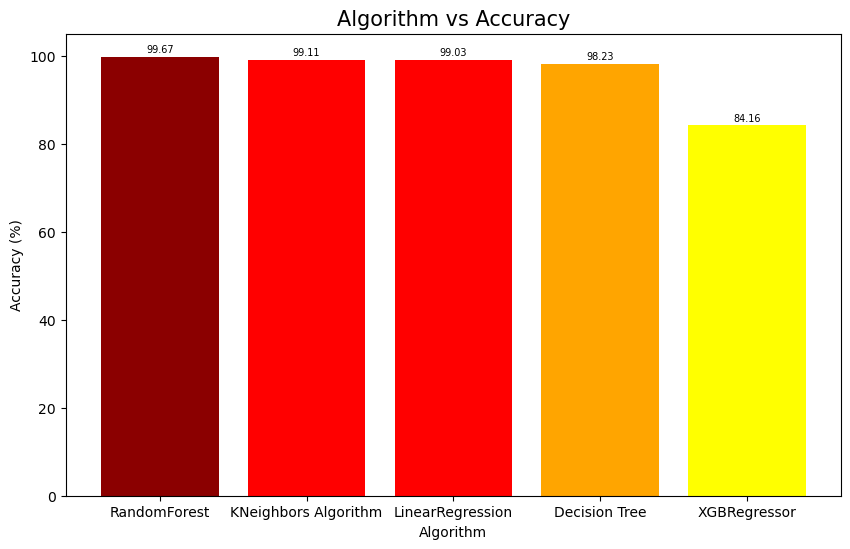

In [85]:
import matplotlib.pyplot as plt

model_names = ['RandomForest', 'KNeighbors Algorithm', 'LinearRegression', 'Decision Tree', 'XGBRegressor']
accuracies = [99.67, 99.11, 99.03, 98.23, 84.16]

colors = ['darkred' if acc >= 99.5 else 'red' if acc >= 99 else 'orange' if acc >= 98 else 'yellow' for acc in accuracies]

plt.figure(figsize=(10, 6))
bars = plt.bar(model_names, accuracies, color=colors)

for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1,
             f'{bar.get_height():.2f}', ha='center', fontsize=7)

plt.title('Algorithm vs Accuracy', fontsize=15)
plt.xlabel('Algorithm', fontsize=10)
plt.ylabel('Accuracy (%)', fontsize=10)
plt.ylim(0, 105)

plt.savefig('algorithm_vs_accuracy.png', dpi=250, bbox_inches='tight')
plt.show()


## Making predictions using model

In [89]:
model = RandomForestRegressor(max_depth=10, min_samples_split=10, n_estimators=300)
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, min_samples_split=10, n_estimators=300)

In [92]:
y_pred = model.predict(X)
print(y_pred)

[197.57541891 223.8301901  137.09685127 ... 240.21152551 231.21273356
 247.74279723]


In [93]:
y

0       196
1       221
2       136
3       255
4       244
       ... 
7380    219
7381    232
7382    240
7383    232
7384    248
Name: CO2 Emissions(g/km), Length: 7385, dtype: int64

In [94]:
# Create a DataFrame to store predictions
predictions_df = df.copy()
predictions_df['Predicted CO2 Emissions'] = y_pred

# Save to CSV
predictions_df.to_csv('predicted_co2_emissions.csv', index=False)


In [95]:
## Exporting Model to a pickle file
import pickle
with open('Co2_emissions.pickle','wb') as f:
    pickle.dump(model,f)

In [96]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))